In [660]:
import pandas as pd
import yfinance as yf

ypairs_dict = {
  "BTC": "BTC-USD",
  "ETH": "ETH-USD",
  "ADA": "ADA-USD",
  "SOL": "SOL-USD" ,
  "AVAX": "AVAX-USD",
   "BNB": "BNB-USD",
   "HEX": "HEX-USD", 
   "LUNA": "LUNA1-USD"
}
for value in ypairs_dict.values():
 
  df = yf.download(value, start='2018-01-01',
                          end='2022-01-10',
                          interval = '1d'
    )
  df.to_csv(f"{value}.csv")
   


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


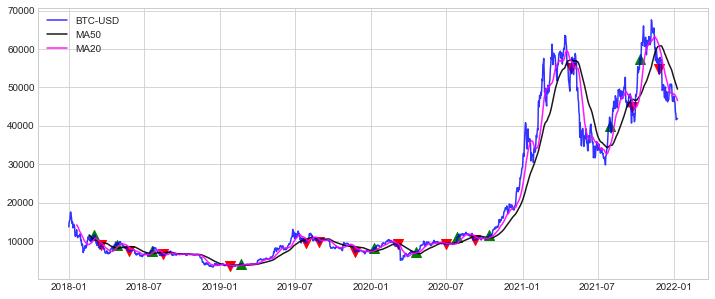

[1000, 0.07322144990912746]
Ended in with 0.3 in crypto for a total of $12546.4
If just HODL would do 3062.2
**********************************************************************
Ended in with 0.3 in crypto for a total of $12546.4
If just HODL would do 3062.2
**********************************************************************


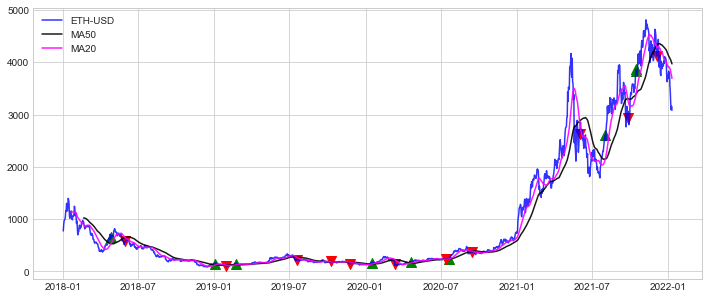

[1000, 1.2942621623436383]
Ended in with 0.5 in crypto for a total of $1541.5
If just HODL would do 3990.3
**********************************************************************
Ended in with 0.4 in crypto for a total of $1233.2
If just HODL would do 3990.3
**********************************************************************


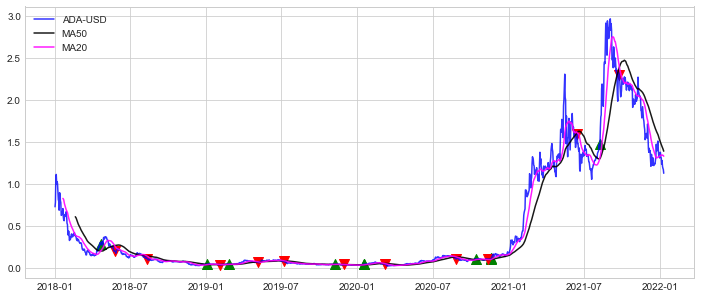

[1000, 1372.3878177179636]
Ended in with 10733.6 in crypto for a total of $12108.1
If just HODL would do 1548.1
**********************************************************************
Ended in with 4208.1 in crypto for a total of $4747.0
If just HODL would do 1548.1
**********************************************************************


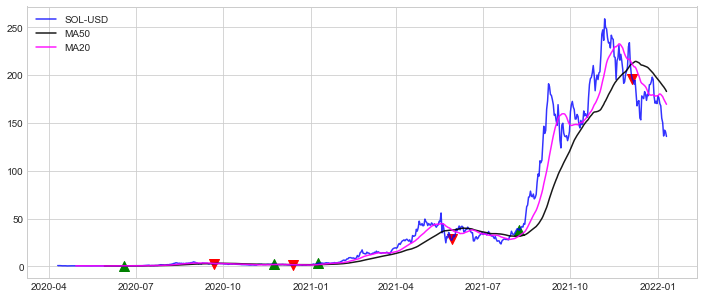

[1000, 1051.4650316074703]
Ended in with 627.1 in crypto for a total of $85257.3
If just HODL would do 142951.9
**********************************************************************
Ended in with 451.2 in crypto for a total of $61342.9
If just HODL would do 142951.9
**********************************************************************


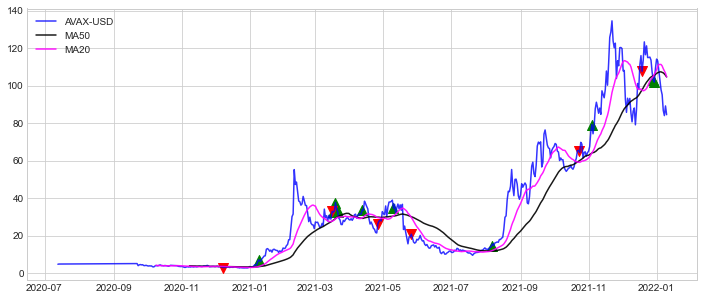

[1000, 204.23609695612885]
Ended in with 131.1 in crypto for a total of $11082.2
If just HODL would do 17264.6
**********************************************************************
Ended in with 83.4 in crypto for a total of $7050.0
If just HODL would do 17264.6
**********************************************************************


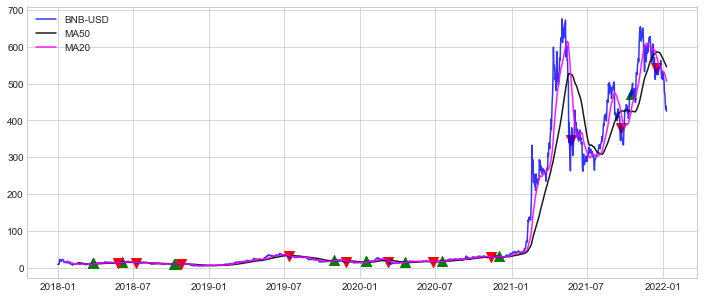

[1000, 118.84092201631171]
Ended in with 25.2 in crypto for a total of $10708.3
If just HODL would do 50499.5
**********************************************************************
Ended in with 36.2 in crypto for a total of $15382.6
If just HODL would do 50499.5
**********************************************************************


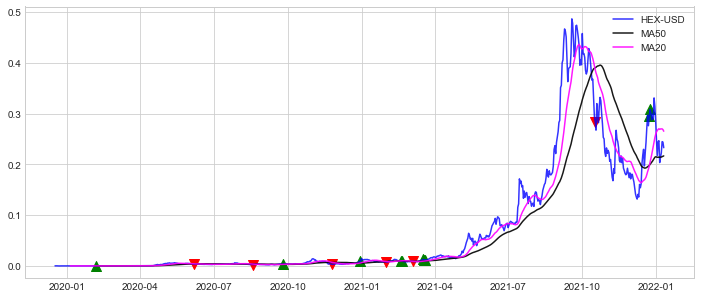

[1000, 5847952.978423766]
Ended in with 781237.5 in crypto for a total of $181961.2
If just HODL would do 1362070.1
**********************************************************************
Ended in with 922867.5 in crypto for a total of $214948.8
If just HODL would do 1362070.1
**********************************************************************


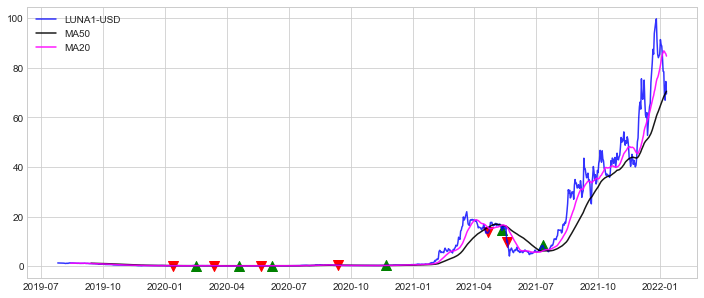

[1000, 753.3320042315727]
Ended in USD for a total of $19556.2
If just HODL would do 52319.8
**********************************************************************
Ended in USD for a total of $3119.9
If just HODL would do 52319.8
**********************************************************************


In [664]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.dates as mdate
from matplotlib import pyplot as plt

if os.path.exists("hodlvsMA.csv"):
      os.remove("hodlvsMA.csv")

for value in ypairs_dict.items():
    pair = value[1]
    df = pd.read_csv(f"/Users/nicolasmartinez/{pair}.csv")
    df[["MA_50"]] = df[["Adj Close"]].rolling(window=50).mean()
    df[["MA_20"]] = df[["Adj Close"]].rolling(window=20).mean()
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df_MA = df[['Date','Adj Close', 'MA_50',"MA_20"]]
    df_MA.dropna()
    last_price = df_MA['Adj Close'].tail(1).values.item()
    buy_list=[]
    sell_list=[]

    for i in range(len(df_MA)):
        if df_MA.MA_20.iloc[i] > df_MA.MA_50.iloc[i-1] \
        and df_MA.MA_20.iloc[i-1]< df_MA.MA_50.iloc[i-1]:
            buy_list.append(i)
        elif df_MA.MA_20.iloc[i]< df_MA.MA_50.iloc[i] \
            and df_MA.MA_20.iloc[i-1]> df_MA.MA_50.iloc[i-1]:
            sell_list.append(i)
    x = df_MA.Date
    plt.figure(figsize=(12,5))
    plt.plot(x, df_MA["Adj Close"], label = pair, c ='blue', alpha=0.8)
    plt.plot(x, df_MA["MA_50"], label = "MA50", c ='k', alpha=0.9)
    plt.plot(x, df_MA["MA_20"], label = "MA20", c ='magenta', alpha=0.9)
    plt.scatter(df_MA.iloc[buy_list]["Date"], df_MA.iloc[buy_list]["Adj Close"],marker ="^", color = "g", s=100)
    plt.scatter(df_MA.iloc[sell_list]["Date"], df_MA.iloc[sell_list]["Adj Close"],marker ="v", color = "r", s=100)
    plt.legend()
    plt.savefig(f"{pair}.png")
    plt.show()
    
    
    sb_list = buy_list + sell_list
    sb_list.sort()

    list_buy_sell = []
    for x in sb_list:
        if x in buy_list:
            list_buy_sell.append(str(x)+'b')
        else:
            list_buy_sell.append(str(x)+'s')
    import os
    bal_USD = 1000
    balance_in_crypto = 1000/df_MA['Adj Close'].head(1).values.item()

    list_start_sc = [bal_USD,balance_in_crypto]#
    buy_sell_list = []# list where to add buying selling info
    buy_sell_df = pd.DataFrame(columns=['crypto', 'started_in', 'trading_or_HODL','ending_bal'])
    started_in=""

    for start in list_start_sc:
        balance_in_crypto = 1000/df_MA['Adj Close'].head(1).values.item()
        #print(f"start: {start}") 

        if start != 1000:
            bal_USD = 0
            
        for i in range(len(list_buy_sell)-1):
            location = int(list_buy_sell[i][0:len(list_buy_sell[i])-1])
            date_transaction =  df_MA.iloc[[location]]["Date"].to_string()
            date_transaction = date_transaction[5:19]
            price = round(df_MA.iloc[[location]]["Adj Close"].values.item(),1)
           
            if list_buy_sell[i][-1] == 's' and i == 0 and start == 1000:
                pass
            elif list_buy_sell[i][-1] == 'b' and i == 0 and start != 1000:
                pass
            else:
                if str(list_buy_sell[i][-1]) == 'b' and round(bal_USD,2) > 0 :
                    balance_in_crypto = bal_USD /df_MA.iloc[[location]]["Adj Close"]
                    bal_USD = 0
                    balance_in_crypto = round(balance_in_crypto.values.item(),1)
               
                elif str(list_buy_sell[i][-1]) == 's' and int(bal_USD) == 0 :
                    bal_USD = round(balance_in_crypto *df_MA.iloc[[location]]["Adj Close"].values.item(),1)
                    balance_in_crypto = 0

        if balance_in_crypto > 0:
            bal_USD = round((balance_in_crypto * last_price),1)
            print(f"Ended in with {balance_in_crypto} in crypto for a total of ${bal_USD}")
        else:
            print(f"Ended in USD for a total of ${bal_USD}")  

        if start == 1000:
            started_in = "Cash"
        else:
            started_in = "Crypto"

        df_length = len(buy_sell_df)
        df2 = {'crypto': pair,'started_in':started_in, \
                   'trading_or_HODL': 'tradingMA','ending_bal': bal_USD}
        buy_sell_df = buy_sell_df.append(df2, ignore_index = True) 

        #if our investor would just hodl
        init_crypto = 1000/df_MA['Adj Close'].head(1).values.item()
        crypto_hodl_last_day = round((init_crypto *  last_price),1)
        print(f"If just HODL would do {crypto_hodl_last_day}")


        print("*"*70)

    df2 = {'crypto': pair,'started_in': 'Crypto',\
                   'trading_or_HODL': 'HODL','ending_bal':  crypto_hodl_last_day}
    buy_sell_df = buy_sell_df.append(df2, ignore_index = True) 
    
    hdr = False  if os.path.isfile('hodlvsMA.csv') else True
    buy_sell_df.to_csv('hodlvsMA.csv', mode='a', header=hdr, index = False)
#print(buy_sell_df)